# FINAL PROJECT 1

Kelompok 3:
- Erlangga Ardiansyah Rukmana - PYTN-KS07-014
- Natasya Yonike Ambarita - PYTN-KS07-013
- Rizqatasyaa Achmad Zahra - PYTN-KS07-012

## Overview

### TENTANG DATA
Database ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya.
Dataset ini berasal dari kaggle yaitu, Uber and Lyft Dataset Boston, MA dari 11-26-2018 hingga 12-18-2018.

Mengandung banyak nilai NA, tetapi data ini sangat ramah bagi pemula. Merupakan dataset yang cocok jika menggunakan Model Regresi untuk melihat prediktor(variabel) yang berbeda seperti hour (jam) dan price (harga).

Bagian yang sangat menakjubkan dari kumpulan data ini adalah saya telah menyertakan data 
cuaca yang sesuai untuk jam tersebut dengan ringkasan singkat tentang cuaca. 
Faktor penting lainnya adalah suhu, angin, dan matahari terbenam.

### INFORMASI ATRIBUT
1.	id = kode untuk perjalanan 
2.	timestamp = stempel waktu untuk menampilkan lokasi sesuai keberadaan
3.	hour = jam untuk data kejadian
4.	day = tanggal untuk data kejadian
5.	month = bulan untuk data kejadian
6.	datetime = tanggal dan waktu untuk data kejadian
7.	timezone = zona waktu untuk data kejadian
8.	source = sumber untuk data lokasi awal
9.	destination = tujuan untuk data lokasi tujuan
10.	cab_type = jenis taksi untuk data jenuis taksi yang digunakan
11.	product_id = kode produk untuk data taksi yang digunakan
12.	name = nama untuk nama layanan taksi yang digunakan
13.	price = harga untuk data biaya yang dibayar
14.	distance = jarak untuk data jarak tempuh perjalanan
15.	surge_multiplier = lonjakan penggandaan untuk data penetapan harga pengganda yang menghasilkan jumlah harga lonjakan untuk pengemudi dan pengendara
16.	latitude = lintang
17.	longitude = garis bujur
18.	temperature = suhu
19.	apparentTemperature = suhu nyata
20.	short_summary = ringkasan singkat
21.	long_summary = ringkasan panjang
22.	precipIntensity = intensitas presipitas
23.	precipProbability = probabilitas presipitasi
24.	humidity = kelembaban
25.	windSpeed = kecepatan angin
26.	windGust = hembusan angin
27.	windGustTime = waktu hembusan angin
28.	visibility = visibilitas
29.	temperatureHigh = suhu tinggi
30.	temperatureHighTime = waktu suhu tinggi
31.	temperatureLow = suhu rendah
32.	temperatureLowTime = waktu suhu rendah
33.	apparentTemperatureHigh = suhu semu tinggi
34.	apparentTemperatureHighTime = waktu suhu semu tinggi
35.	apparentTemperatureLow = suhu semu rendah
36.	apparentTemperatureLowTime = waktu suhu semu rendah
37.	icon = ikon 
38.	dewPoint = titik embun
39.	pressure = tekanan
40.	windBearing = bantalan angin
41.	cloudCover = tutupan awan
42.	uvIndex = indeks uv
43.	visibility.1 = visibilitas.1
44.	ozone = ozon
45.	sunriseTime = waktu matahari terbit
46.	sunsetTime = waktu matahari terbenam
47.	moonPhase = fase bulan
48.	precipIntensityMax = Intensitas presipitasi Maks
49.	uvIndexTime = waktu indeks uv
50.	temperatureMin = suhu minimal
51.	temperatureMinTime = waktu suhu minimal
52.	temperatureMax = suhu maksimal
53.	temperatureMaxTime = waktu suhu maksimal
54.	apparentTemperatureMin = suhu semu minimal
55.	apparentTemperatureMinTime = waktu suhu semu minal
56.	apparentTemperatureMax = suhu semu maksimal
57.	apparentTemperatureMaxTime = waktu suhu semu maksimal

### OBJECTIVE YANG INGIN DI CAPAI
Final Project 1 ini dibuat guna mengevaluasi konsep Regression sebagai berikut:
- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi


## IMPORT PUSTAKA YANG DIBUTUHKAN

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#preprocess
from sklearn.preprocessing import StandardScaler,LabelEncoder

#model_selection
from sklearn.model_selection import train_test_split

#import the necessary modelling algos.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#evalution
from sklearn.metrics import r2_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

## DATA LOADING

In [2]:
df = pd.read_csv('../dataset/rideshare_kaggle/rideshare_kaggle.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.shape

(693071, 57)

Diketahui, data kita terdiri dari 693071 baris dan 57 kolom.

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
df['cab_type'].value_counts()

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64

## Cek Informasi Data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## DATA CLEANING

### CEK MISSING VALUE

In [7]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [8]:
df.isnull().values.any()

True

Output True artinya pada dataset terdapat missing value

In [9]:
df.isnull().sum().sum()

55095

Output 55095 berarti jumlah missing value pada kolom price

### Drop Missing Value

Dikarenakan kita akan memprediksi harga pada dataset ini, dan kebetulan pada dataset ini terdapat data yang null pada kolom <b>price</b>, maka secara tidak langsung kita tidak memiliki label/prediksi dari features nya ketika kolom <b>price</b> null. Maka dari itu kita drop missing value yang terdapat pada kolom <b>price</b>

In [10]:
df.dropna(axis=0, inplace=True)

In [11]:
df.isnull().sum().sum()

0

Jumlah missing value menjadi 0 karena missing value sudah diisi drop atau dihapus

### CEK DUPLIKASI DATA

In [12]:
df.duplicated().any()

False

In [13]:
df.duplicated().sum()

0

Tidak ada data yang duplikat

### Memanipulasi Data

In [14]:
df['name'] = df['name'].str.replace('Black SUV', 'BlackSUV')
df['name'] = df['name'].str.replace('Lyft Black XL', 'LyftBlackXL')
df['name'] = df['name'].str.replace('Lyft XL', 'LyftXL')
df['name'] = df['name'].str.replace('Lux Black XL', 'LuxBlackXL')
df['name'] = df['name'].str.replace('Lux Black', 'LuxBlack')

In [15]:
df['name'].unique()

array(['Shared', 'Lux', 'Lyft', 'LuxBlackXL', 'LyftXL', 'LuxBlack',
       'UberXL', 'Black', 'UberX', 'WAV', 'BlackSUV', 'UberPool'],
      dtype=object)

### MEMBERSIHKAN KOLOM
Menghapus kolom yang datanya tidak di butuhkan

In [16]:
df_final = df[['source', 'destination', 'cab_type', 'name', 'price', 'distance', 'surge_multiplier']]

In [17]:
df_final.head(5)

,source,destination,cab_type,name,price,distance,surge_multiplier
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,Lyft,LuxBlackXL,26.0,0.44,1.0
4,Haymarket Square,North Station,Lyft,LyftXL,9.0,0.44,1.0


### MENGUBAH NILAI PADA KOLOM CAB_TYPE MENJADI NUMERIK

In [18]:
cabt_map = {'Lyft':1, 'Uber':2}
df_final['cab_type'] = df_final['cab_type'].map(cabt_map)

In [19]:
df_final

,source,destination,cab_type,name,price,distance,surge_multiplier
0,Haymarket Square,North Station,1,Shared,5.0,0.44,1.0
1,Haymarket Square,North Station,1,Lux,11.0,0.44,1.0
2,Haymarket Square,North Station,1,Lyft,7.0,0.44,1.0
3,Haymarket Square,North Station,1,LuxBlackXL,26.0,0.44,1.0
4,Haymarket Square,North Station,1,LyftXL,9.0,0.44,1.0
...,...,...,...,...,...,...,...
693065,West End,North End,2,WAV,9.5,1.00,1.0
693066,West End,North End,2,UberXL,13.0,1.00,1.0
693067,West End,North End,2,UberX,9.5,1.00,1.0
693069,West End,North End,2,BlackSUV,27.0,1.00,1.0


Output diatas diketahui bahwa setaleh mengubah data pada kolom cab_type 

### Cek dan Hapus data duplikat - df_final

In [20]:
df_final.duplicated().sum()

557509

In [21]:
df_final =df_final.drop_duplicates()

In [22]:
df_final.duplicated().sum()

0

In [23]:
df_final.shape

(80467, 7)

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80467 entries, 0 to 693070
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   source            80467 non-null  object 
 1   destination       80467 non-null  object 
 2   cab_type          80467 non-null  int64  
 3   name              80467 non-null  object 
 4   price             80467 non-null  float64
 5   distance          80467 non-null  float64
 6   surge_multiplier  80467 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.9+ MB


In [25]:
df_final.describe()

,cab_type,price,distance,surge_multiplier
count,80467.000000,80467.000000,80467.000000,80467.000000
mean,1.405707,20.126735,2.509218,1.088067
std,0.491031,11.848018,1.178509,0.223610
min,1.000000,2.500000,0.020000,1.000000
25%,1.000000,10.500000,1.570000,1.000000
50%,1.000000,17.000000,2.430000,1.000000
75%,2.000000,27.500000,3.160000,1.000000
max,2.000000,97.500000,7.860000,3.000000


## Exploratory Data Analysis
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

### Manakah yang lebih mahal, Uber atau Lyft?

<AxesSubplot:xlabel='cab_type', ylabel='price'>

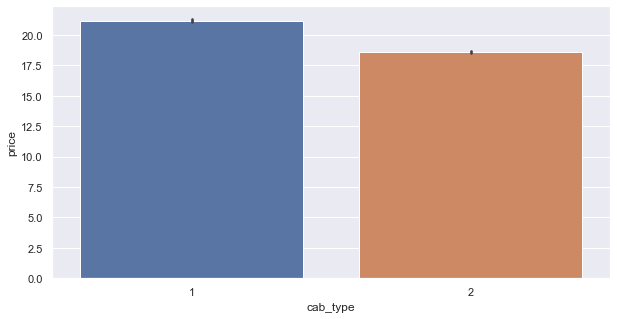

In [26]:
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x='cab_type', y='price', data=df_final)

Pada visualisasi diatas menunjukan bahwa <b>Lyft</b> memiliki harga yang lebih tinggi dari <b>Uber</b>

In [27]:
df_final.groupby('cab_type')['price'].mean()

cab_type
1    21.166391
2    18.603811
Name: price, dtype: float64

Rata rata harga pada Lyft berkisar di 20 dollar sedangkan Uber di 18 dollar

### Apakah benar jenis produk yang dimiliki oleh Uber dan Lyft mempengaruhi tarif perjalanan?

<AxesSubplot:xlabel='price', ylabel='name'>

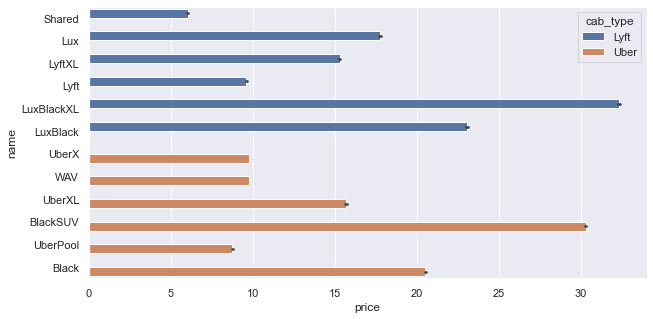

In [28]:
df.sort_values('cab_type', inplace=True)
sns.set(rc={'figure.figsize':(10,5)})

sns.barplot(y='name', 
            x='price',
            data=df,
            hue='cab_type')

In [29]:
df_final.groupby('name')['price'].mean()

name
Black         23.344216
BlackSUV      33.379970
Lux           21.960489
LuxBlack      28.611307
LuxBlackXL    37.799874
Lyft          11.368927
LyftXL        18.431629
Shared         6.543984
UberPool      10.402622
UberX         12.168190
UberXL        19.554174
WAV           12.168190
Name: price, dtype: float64

Data diatas menunjukan bahwa tiap jenis produk pada masing masing penyedia jasa memiliki pengaruh terhadap harga.

Menurut dataset:

<li><b>Produk Lyft</b> yang termahal adalah Lux Black XL dengan harga rata-rata perjalanannya sebesar 37.70 USD dan produk termurahnya adalah Shared dengan harga rata-rata perjalannya sebesar 6.5 USD.

<li> <b>Produk Uber</b> yang termahal adalah Black SUV dengan harga rata-rata perjalanannya sebesar 33.3 USD dan produk termurahnya adalah UberPool dengan harga rata-rata perjalannya sebesar 10.4 USD.

### Apakah ada korelasi antara jarak yang ditempuh dengan tarif perjalanan?

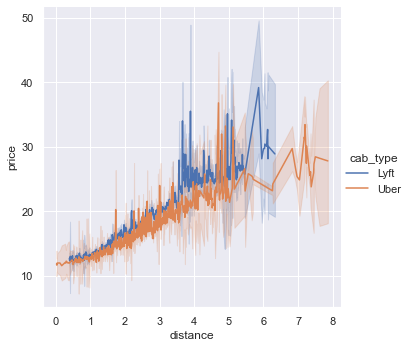

In [30]:
sns.set(rc={'figure.figsize':(12,8)})
sns.relplot(kind='line',
            x='distance',
            y='price',
            data=df,
            hue='cab_type')

Berdasarkan grafik diatas dapat dilihat bahwa semakin besar jarak yang ditempuh oleh produk milik Uber dan Lyft maka semakin besar pula tarif perjalanan. Produk Lyft memiliki tarif lebih tinggi dibandingkan Uber walaupun jarak yang ditempuh tidak terlalu besar daripada Uber.

### Manakah yang mengalami lonjakan pesanan tertinggi selama November dan Desember?

In [31]:
surge_price = df_final.pivot_table(values='price',
                     index=['surge_multiplier'],
                     columns=['cab_type'],
                     aggfunc=np.mean,
                     fill_value=0)

surge_price.loc['mean'] = surge_price.mean()
surge_price = surge_price.T
surge_price = surge_price.reset_index(drop=False)
surge_price.sort_values('mean', ascending=False, inplace=True)

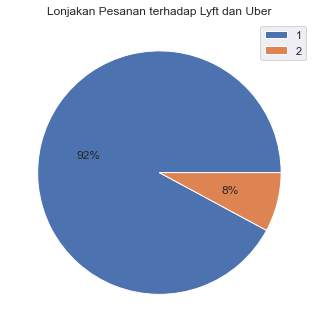

In [32]:
colors = sns.color_palette()

#create pie chart
plt.subplot(121)
plt.pie(surge_price['mean'],
        colors = colors,
        labels = None,
        autopct='%.0f%%')
plt.title("Lonjakan Pesanan terhadap Lyft dan Uber")
plt.legend(labels=surge_price.cab_type, loc='upper right')
plt.show()

Dari grafik diatas terlihat jelas, bahwa produk Lyft adalah produk yang paling tinggi lonjakan pesanannya selama 2 bulan ini yaitu November dan Desember.

### Memahami distribusi setiap variabel kolom kategori dengan yang lain

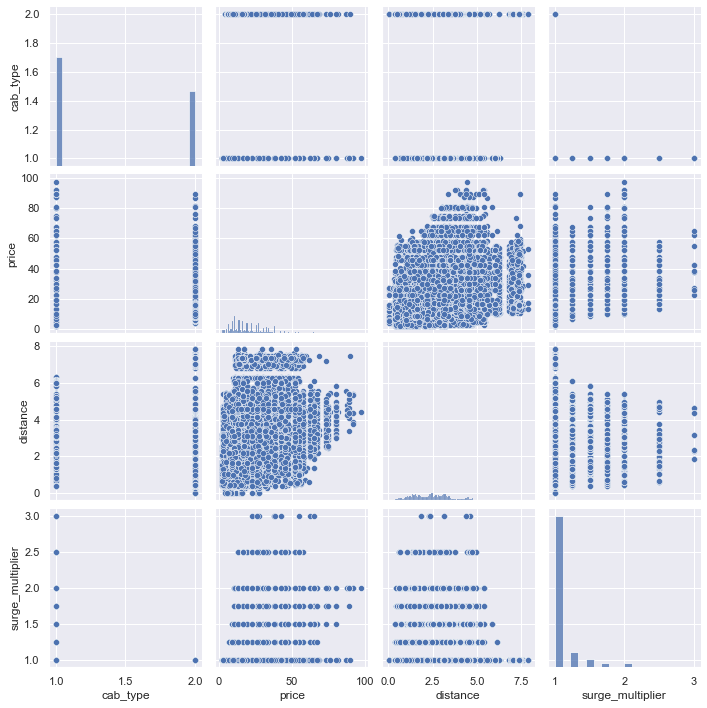

In [33]:
sns.pairplot(df_final)

## DATA PREPROCESSING

### Label Encoder

In [34]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df_final['cab_type'] = label.fit_transform(df_final['cab_type'])
df_final['name'] = label.fit_transform(df_final['name'])
df_final['source'] = label.fit_transform(df_final['source'])
df_final['destination'] = label.fit_transform(df_final['destination'])

In [35]:
df_final.sample(5)

,source,destination,cab_type,name,price,distance,surge_multiplier
500369,10,2,1,11,21.0,2.73,1.0
207901,3,1,1,10,19.5,3.06,1.0
228615,10,3,0,3,27.5,3.06,1.0
243576,8,7,1,8,7.0,3.20,1.0
581589,2,0,0,7,3.5,1.92,1.0


### Data Scaling

In [36]:
scaler = StandardScaler()

In [37]:
datax = df_final.drop(['price'],axis=1)

In [38]:
X = scaler.fit_transform(datax)
y = df_final['price']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
print('Dimensi:', X_train.shape)
print('Dimensi:', X_test.shape)
print('Dimensi:', y_train.shape)
print('Dimensi:', y_test.shape)

Dimensi: (64373, 6)
Dimensi: (16094, 6)
Dimensi: (64373,)
Dimensi: (16094,)


## Modelling

Metode Machine Learning untuk project ini adalah supervised learning-regresi dengan tujuan agar mesin mampu mengidentifikasi label input yang baru dengan menggunakan fitur yang ada untuk melakukan prediksi.

Mmiliki column/data label sehingga outputnya jelas
- prediktor(sebab) -> feature, variabel independent = distance, surge_multiplier
- label(akibat) -> target, variabel dependent = price


### LINEAR REGRESSION

In [41]:
linear = LinearRegression()
linearmodel = linear.fit(X_train, y_train)

In [42]:
y_pred = linearmodel.predict(X_test)

In [43]:
linearmodel.score(X_train, y_train)

0.4837340128756492

In [44]:
linearmodel.score(X_test, y_test)

0.489203306903635

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Root Mean Squared Error', rmse)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

Root Mean Squared Error 8.419409554733653
Mean Squared Error: 70.88645725034033
Mean Absolute Error: 6.560180558935535


In [47]:
print("accuracy :" + str(linear.score(X_test, y_test)))
print("variance :" + str(explained_variance_score(y_test, y_pred)))

accuracy :0.489203306903635
variance :0.48920838859568794


In [48]:
errors1 = abs(y_pred - y_test)
print("Mean Absolute Error:", round(np.mean(errors1), 2), "degrees.")

Mean Absolute Error: 6.56 degrees.


In [49]:
lrmape = 100 * (errors1 / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(lrmape)
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 54.27 %.


### Prediksi Data Baru

In [50]:
X_new = {'cab_type':[1,2,3], 'distance':[1,2,3], 'surge_multiplier':[1,2,3], 'name':[0,1,0], 'destination':[1,2,3], 'source':[1,2,3]}
X_new = pd.DataFrame(X_new)

In [51]:
y_pred2 = linearmodel.predict(X_new)
print('Prediksi Tarif yaitu: ')
print(y_pred)

Prediksi Tarif yaitu: 
[19.93731274 21.48285318 12.84722176 ... 19.22216452 23.51764205
 15.35634012]


## Visualize Model

In [52]:
data_model = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_model.head()

,Actual,Predicted
315361,16.5,19.937313
30824,22.5,21.482853
415105,7.0,12.847222
205550,27.5,14.338320
428324,13.5,10.242458


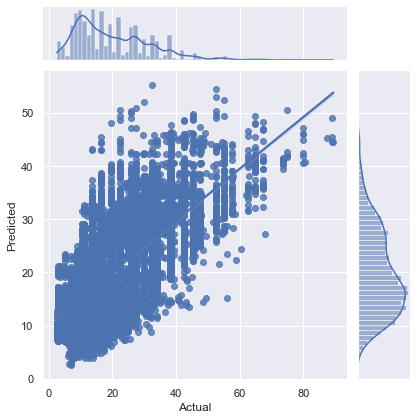

In [53]:
sns.jointplot(x='Actual', y='Predicted', data=data_model, kind='reg')

## Import The Model

In [55]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(linearmodel)
 
# Load the pickled model
model_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
model_from_pickle.predict(X_test)

array([19.93731274, 21.48285318, 12.84722176, ..., 19.22216452,
       23.51764205, 15.35634012])

In [57]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(linearmodel, 'linear_regression.pkl')
 
# Load the model from the file
model_from_joblib = joblib.load('linear_regression.pkl')
 
# Use the loaded model to make predictions
model_from_joblib.predict(X_test)

array([19.93731274, 21.48285318, 12.84722176, ..., 19.22216452,
       23.51764205, 15.35634012])